In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [7]:

# Read our data file the pandas library
file_path = Path("../Resources/Virginia_predictions_results.csv")
data = pd.read_csv(file_path)

file_path2 = Path("../Resources/proj_4_feat_target_var_set_update.csv")
data2 = pd.read_csv(file_path2)

# Display sample data

data2.head()

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
0,1,AL,Alabama,0,2010,3439923,4785298,3426273,0.716,0.102,...,162068.8,148862.1,33849,31091,40474,0.172,101835000,29.60,NaN,NaN
1,2,AK,Alaska,1,2010,494781,713985,494078,0.692,0.105,...,35374.3,32703.9,49543,45803,64576,0.125,15476350,31.28,NaN,NaN
2,4,AZ,Arizona,0,2010,4496526,6413737,4502443,0.702,0.099,...,216223.6,198815.2,33774,31055,46789,0.188,140015325,31.14,NaN,NaN
3,5,AR,Arkansas,0,2010,2082760,2921606,2074340,0.710,0.100,...,94127.0,86387.0,32218,29569,38307,0.153,53429000,25.65,NaN,NaN
4,6,CA,California,0,2010,26311028,37349363,26293952,0.704,0.106,...,1609997.5,1431825.6,43138,38364,57708,0.163,651673303,24.77,NaN,NaN


In [3]:
sample_data = data['Predicted_Value']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 28.91621800531745
Upper Bound: 30.371703064744022


,Percentage,Predicted_Value,Lower Bound,Upper Bound
0,0.01,21.186022,28.916218,30.371703
1,0.02,21.186022,28.916218,30.371703
2,0.03,21.186022,28.916218,30.371703
3,0.04,21.186022,28.916218,30.371703
4,0.05,21.369901,28.916218,30.371703


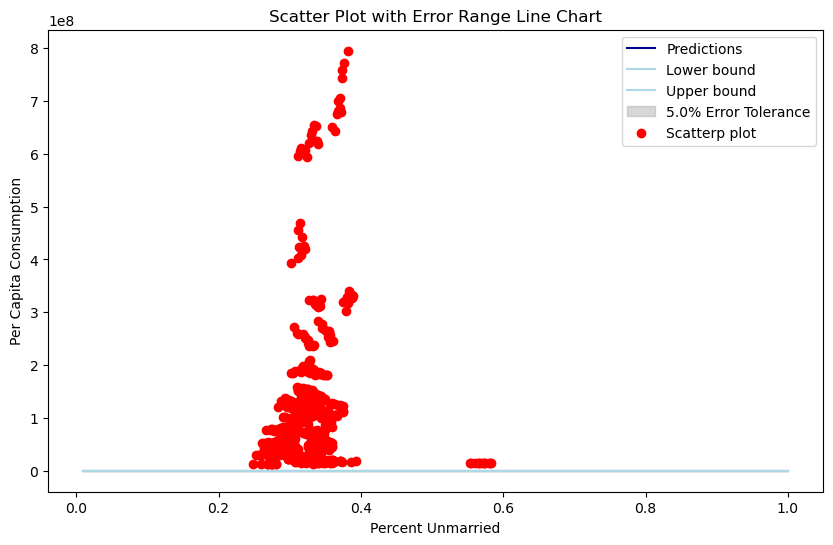

In [5]:
# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['Percentage']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['Predicted_Value']  # Replace 'Y-axis' with the actual column name for Y-axis data

tolerance = 0.05
lowerY = data['Predicted_Value'] * (1 - tolerance)
upperY = data['Predicted_Value'] * (1 + tolerance)

# Plot the error range with the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Predictions', color = 'darkblue')
plt.plot(x_values, lowerY, label='Lower bound', color = 'lightblue')
plt.plot(x_values, upperY, label='Upper bound', color = 'lightblue')
plt.fill_between(x_values, lowerY, upperY, color='gray', alpha=0.3, label=f'{tolerance*100}% Error Tolerance')

plt.scatter(data2['census_percent_pop_never_married'], data2['niaaa_total_beer_vol_consumed_gallons'], label='Scatterp plot', color='red')

# Customize labels and title
plt.xlabel('Percent Unmarried')
plt.ylabel('Per Capita Consumption')
plt.title('Scatter Plot with Error Range Line Chart')
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()